In [ ]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd
music_df = pd.read_csv("features_30_sec.csv")
display(music_df.head())

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
# Extract features (X) and labels (y)
x = music_df.drop(['label'], axis=1)  # Assuming 'label' is the column containing class labels
X = x.iloc[:, 1:]
y = music_df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the DataFrames
print("X_train_scaled DataFrame:")
display(X_train_scaled_df)

print("\nX_test_scaled DataFrame:")
display(X_test_scaled_df)


X_train_scaled DataFrame:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.047185,0.220475,0.958524,0.304204,0.173361,0.279104,0.232568,0.494689,0.255132,0.379736,...,0.258668,0.195535,0.203719,0.215243,0.184118,0.255215,0.255698,0.159809,0.167242,0.150527
1,0.047185,0.188433,0.698074,0.219546,0.043903,0.070900,0.014339,0.079015,0.022693,0.108387,...,0.589212,0.088657,0.531394,0.055876,0.239620,0.155681,0.501112,0.077155,0.465340,0.098834
2,0.047185,0.726479,0.346493,0.458803,0.136059,0.485415,0.082283,0.548688,0.065832,0.560465,...,0.876429,0.059567,0.370036,0.050200,0.561287,0.103218,0.458337,0.064113,0.668138,0.051127
3,0.047185,0.126546,0.742382,0.185536,0.081927,0.209170,0.052962,0.335280,0.111277,0.231539,...,0.407959,0.104241,0.547965,0.150885,0.302318,0.248414,0.370952,0.264297,0.356627,0.178628
4,0.047185,0.534238,0.758397,0.190243,0.114053,0.321047,0.213458,0.485612,0.250776,0.424932,...,0.738312,0.158150,0.610115,0.174856,0.617238,0.130898,0.547257,0.159955,0.540346,0.119525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.047185,0.182076,0.616996,0.071147,0.011993,0.207647,0.020631,0.260818,0.028278,0.250812,...,0.629251,0.197364,0.536436,0.215316,0.324184,0.266876,0.561544,0.195542,0.655300,0.203533
796,0.047185,0.393271,0.636971,0.354231,0.100768,0.353075,0.079948,0.410510,0.128575,0.416122,...,0.607532,0.143757,0.344071,0.088158,0.451332,0.092624,0.513430,0.059816,0.397000,0.076553
797,0.027468,0.258553,0.726531,0.052330,0.011742,0.472277,0.280986,0.537018,0.204266,0.509863,...,0.576490,0.126287,0.288101,0.213886,0.334286,0.090170,0.391863,0.142524,0.326536,0.129227
798,0.478651,0.727257,0.619383,0.475531,0.305884,0.583965,0.362659,0.741297,0.228111,0.687059,...,0.709583,0.087745,0.517444,0.073665,0.633274,0.109123,0.641395,0.080578,0.668115,0.076703



X_test_scaled DataFrame:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.047185,0.530290,0.648660,0.108737,0.014257,0.606689,0.151234,0.582925,0.065221,0.645238,...,0.883713,0.112723,0.391130,0.076799,0.518821,0.131031,0.456358,0.144647,0.635667,0.108862
1,0.027468,0.569168,0.619337,0.600230,0.289870,0.690306,0.207120,0.787286,0.228599,0.750735,...,0.528653,0.099255,0.524310,0.063629,0.373144,0.114012,0.538777,0.115436,0.449897,0.097075
2,0.027468,0.244689,0.624570,0.494151,0.202975,0.360135,0.083659,0.546392,0.246486,0.387370,...,0.669393,0.166132,0.581028,0.165697,0.411225,0.226275,0.576738,0.139701,0.507940,0.213612
3,0.047185,0.749188,0.191401,0.306812,0.022359,0.451536,0.035438,0.447463,0.038462,0.487712,...,0.621670,0.033225,0.362977,0.028023,0.587709,-0.000763,0.454885,0.018046,0.614511,0.020339
4,0.047185,0.553279,0.618448,0.505471,0.237961,0.394644,0.139456,0.514246,0.146212,0.483407,...,0.715707,0.176476,0.502206,0.223610,0.683042,0.290950,0.382510,0.238070,0.457868,0.181324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.047185,0.572824,0.665603,0.347733,0.283160,0.646983,0.292548,0.555833,0.136457,0.631301,...,0.791038,0.250695,0.616753,0.358480,0.911571,0.378399,0.736443,0.336869,0.718732,0.298490
196,0.047185,0.399405,0.704844,0.269411,0.158514,0.485583,0.159292,0.593929,0.299107,0.530857,...,0.554097,0.181684,0.563407,0.168174,0.598104,0.306301,0.527851,0.162171,0.415666,0.241615
197,0.179494,0.372882,0.581282,0.685617,0.036595,0.500794,0.090660,0.641846,0.158487,0.596683,...,0.616333,0.173463,0.685798,0.160243,0.668114,0.306466,0.456375,0.155939,0.743365,0.140956
198,0.027468,0.944128,-0.058561,0.206413,0.004958,0.640979,0.035767,0.538144,0.010993,0.628917,...,0.919576,0.036045,0.255206,0.026381,0.618678,0.009446,0.396281,0.014131,0.672170,0.022202


In [ ]:
n_components = 40   # Set the desired number of components
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)


# Train a machine learning model (e.g., RandomForest) using the PCA-transformed features
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test set
predictions = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.735


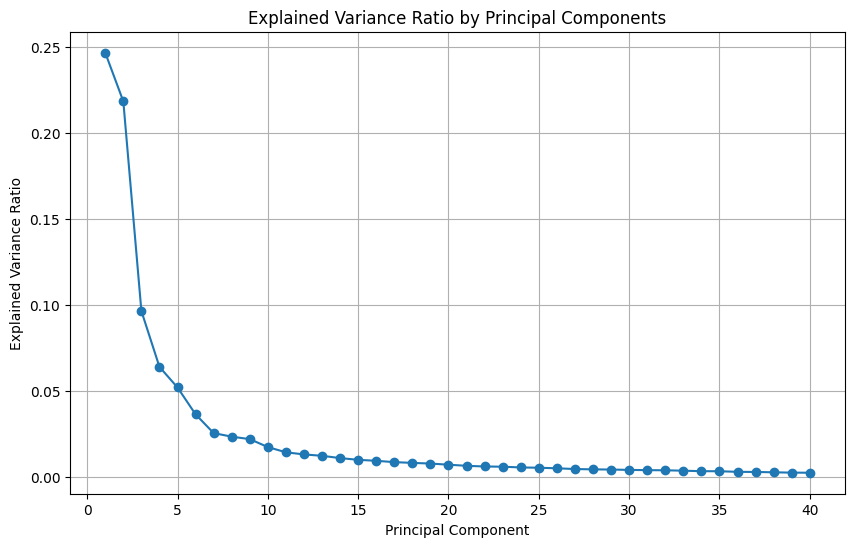

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explained Variance Ratio for PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components+1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()



